<img src="python_logo.svg" alt="Header" style="width: 300px;"/>

In [1]:
import pandas as pd
import numpy as np
import pyfpgrowth
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import random
from operator import itemgetter
import collections

# 1. Prepare The Data

### Import Dataset

In [2]:
# Input dataset name       
input_dataset_name = input('Dataset Name = ')

Dataset Name = EMSC-Data.csv


In [3]:
data_for_visualization = pd.read_csv('Data/'+input_dataset_name, low_memory=False)
data_for_process = pd.read_csv('Data/'+input_dataset_name, low_memory=False)

In [4]:
print('Data Before Cleaning :')
data_for_visualization

Data Before Cleaning :


,Date,Time UTC,Latitude,Longitude,Depth,Magnitude Type,Magnitude,Region Name,Last Update,Eqid,Year,Month,Day
0,3/13/2019,3:24:48,19.34,-155.15,1,Ml,2.1,"ISLAND OF HAWAII, HAWAII",3/13/2019 3:30,750458,2019,3,13
1,3/13/2019,3:19:34,36.93,-5.27,24,ML,2.6,STRAIT OF GIBRALTAR,3/13/2019 3:24,750457,2019,3,13
2,3/13/2019,3:06:49,37.76,14.50,10,ML,2.0,"SICILY, ITALY",3/13/2019 3:12,750455,2019,3,13
3,3/13/2019,3:01:50,-4.86,134.01,35,mb,4.2,"NEAR S COAST OF PAPUA, INDONESIA",3/13/2019 3:14,750453,2019,3,13
4,3/13/2019,2:42:25,69.63,-144.41,10,mb,4.5,NORTHERN ALASKA,3/13/2019 3:07,750451,2019,3,13
5,3/13/2019,2:41:37,36.98,-5.28,10,ML,4.0,STRAIT OF GIBRALTAR,3/13/2019 3:26,750450,2019,3,13
6,3/13/2019,2:11:01,-28.64,-70.40,88,ML,4.0,"ATACAMA, CHILE",3/13/2019 2:26,750448,2019,3,13
7,3/13/2019,1:50:48,0.11,119.74,35,mb,4.3,"MINAHASA, SULAWESI, INDONESIA",3/13/2019 2:41,750427,2019,3,13
8,3/13/2019,1:41:45,66.33,-157.31,10,ML,2.6,NORTHERN ALASKA,3/13/2019 2:03,750442,2019,3,13
9,3/13/2019,1:27:43,31.02,-87.26,5,mb,2.3,ALABAMA,3/13/2019 3:10,750454,2019,3,13


## 1.1. Data Cleaning

### 1.1.1. Handle Missing Value

In [5]:
# Data Cleaning ( Handle Missing Value )
data_for_process.fillna(method='ffill',inplace=True) # Fill Forward
data_for_process.fillna(method='bfill',inplace=True) # Fill Backward
data_for_visualization.fillna(method='ffill',inplace=True) # Fill Forward
data_for_visualization.fillna(method='bfill',inplace=True) # Fill Backward

In [6]:
preview_after_data_cleaning = data_for_visualization.head(10)

In [7]:
for col in preview_after_data_cleaning.columns:
    print(col)

Date
Time UTC
Latitude
Longitude
Depth
Magnitude Type
Magnitude
Region Name
Last Update
Eqid
Year
Month
Day


In [8]:
print('Data After Cleaning :')
data_for_visualization

Data After Cleaning :


,Date,Time UTC,Latitude,Longitude,Depth,Magnitude Type,Magnitude,Region Name,Last Update,Eqid,Year,Month,Day
0,3/13/2019,3:24:48,19.34,-155.15,1,Ml,2.1,"ISLAND OF HAWAII, HAWAII",3/13/2019 3:30,750458,2019,3,13
1,3/13/2019,3:19:34,36.93,-5.27,24,ML,2.6,STRAIT OF GIBRALTAR,3/13/2019 3:24,750457,2019,3,13
2,3/13/2019,3:06:49,37.76,14.50,10,ML,2.0,"SICILY, ITALY",3/13/2019 3:12,750455,2019,3,13
3,3/13/2019,3:01:50,-4.86,134.01,35,mb,4.2,"NEAR S COAST OF PAPUA, INDONESIA",3/13/2019 3:14,750453,2019,3,13
4,3/13/2019,2:42:25,69.63,-144.41,10,mb,4.5,NORTHERN ALASKA,3/13/2019 3:07,750451,2019,3,13
5,3/13/2019,2:41:37,36.98,-5.28,10,ML,4.0,STRAIT OF GIBRALTAR,3/13/2019 3:26,750450,2019,3,13
6,3/13/2019,2:11:01,-28.64,-70.40,88,ML,4.0,"ATACAMA, CHILE",3/13/2019 2:26,750448,2019,3,13
7,3/13/2019,1:50:48,0.11,119.74,35,mb,4.3,"MINAHASA, SULAWESI, INDONESIA",3/13/2019 2:41,750427,2019,3,13
8,3/13/2019,1:41:45,66.33,-157.31,10,ML,2.6,NORTHERN ALASKA,3/13/2019 2:03,750442,2019,3,13
9,3/13/2019,1:27:43,31.02,-87.26,5,mb,2.3,ALABAMA,3/13/2019 3:10,750454,2019,3,13


In [9]:
data_for_visualization.to_csv('Hasil Preprocessing/Data after Data Cleaning.csv', index = False)

### 1.1.2. Check for Numeric Attribute

In [10]:
print("All Attribute(s) :", list(data_for_visualization.columns))

All Attribute(s) : ['Date', 'Time UTC', 'Latitude', 'Longitude', 'Depth', 'Magnitude Type', 'Magnitude', 'Region Name', 'Last Update', 'Eqid', 'Year', 'Month', 'Day']


In [11]:
# Check for numeric attribut
numerics = ['int_','int8','int16', 'int32', 'int64','uint8','uint16', 'uint32', 'uint64', 'float_', 'float16', 'float32', 'float64']
attribute_numeric = data_for_visualization.select_dtypes(include=numerics)

In [12]:
print("Numeric Attribute(s) :",list(attribute_numeric.columns))

Numeric Attribute(s) : ['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Eqid', 'Year', 'Month', 'Day']


### 1.1.3. Check for Nominal Attribute

In [13]:
# Check for nominal attribute
attribute_nominal = data_for_visualization.select_dtypes(include = ['O'])

In [14]:
print("Nominal Attribute(s) :",list(attribute_nominal.columns))

Nominal Attribute(s) : ['Date', 'Time UTC', 'Magnitude Type', 'Region Name', 'Last Update']


### 1.1.4. Transform Nominal to Numeric

In [15]:
# Transform the nominal attribute values to numeric values
for att_nom in attribute_nominal:
    data_for_visualization[att_nom]=data_for_visualization[att_nom].astype('category').cat.codes

### 1.1.5. Check ID in Dataset

In [16]:
ListOfId = []
for i in data_for_visualization.columns:
    if (data_for_visualization[i].nunique()) == len(data_for_visualization):
        ListOfId.append(i)

In [17]:
ListOfId

['Eqid']

Delete ID Column from Dataset

In [18]:
for i in ListOfId:
    del data_for_process[i]
    del data_for_visualization[i]

In [19]:
data_for_process

,Date,Time UTC,Latitude,Longitude,Depth,Magnitude Type,Magnitude,Region Name,Last Update,Year,Month,Day
0,3/13/2019,3:24:48,19.34,-155.15,1,Ml,2.1,"ISLAND OF HAWAII, HAWAII",3/13/2019 3:30,2019,3,13
1,3/13/2019,3:19:34,36.93,-5.27,24,ML,2.6,STRAIT OF GIBRALTAR,3/13/2019 3:24,2019,3,13
2,3/13/2019,3:06:49,37.76,14.50,10,ML,2.0,"SICILY, ITALY",3/13/2019 3:12,2019,3,13
3,3/13/2019,3:01:50,-4.86,134.01,35,mb,4.2,"NEAR S COAST OF PAPUA, INDONESIA",3/13/2019 3:14,2019,3,13
4,3/13/2019,2:42:25,69.63,-144.41,10,mb,4.5,NORTHERN ALASKA,3/13/2019 3:07,2019,3,13
5,3/13/2019,2:41:37,36.98,-5.28,10,ML,4.0,STRAIT OF GIBRALTAR,3/13/2019 3:26,2019,3,13
6,3/13/2019,2:11:01,-28.64,-70.40,88,ML,4.0,"ATACAMA, CHILE",3/13/2019 2:26,2019,3,13
7,3/13/2019,1:50:48,0.11,119.74,35,mb,4.3,"MINAHASA, SULAWESI, INDONESIA",3/13/2019 2:41,2019,3,13
8,3/13/2019,1:41:45,66.33,-157.31,10,ML,2.6,NORTHERN ALASKA,3/13/2019 2:03,2019,3,13
9,3/13/2019,1:27:43,31.02,-87.26,5,mb,2.3,ALABAMA,3/13/2019 3:10,2019,3,13


### 1.1.6. Check Correlation

In [20]:
# Check Correlation
corr = data_for_visualization.corr()

In [21]:
data_for_visualization

,Date,Time UTC,Latitude,Longitude,Depth,Magnitude Type,Magnitude,Region Name,Last Update,Year,Month,Day
0,1000,60855,19.34,-155.15,1,10,2.1,327,107429,2019,3,13
1,1000,60550,36.93,-5.27,24,4,2.6,928,107427,2019,3,13
2,1000,59809,37.76,14.50,10,4,2.0,834,107425,2019,3,13
3,1000,59518,-4.86,134.01,35,15,4.2,508,107426,2019,3,13
4,1000,58406,69.63,-144.41,10,15,4.5,584,107423,2019,3,13
5,1000,58358,36.98,-5.28,10,4,4.0,928,107428,2019,3,13
6,1000,56589,-28.64,-70.40,88,4,4.0,38,107420,2019,3,13
7,1000,41454,0.11,119.74,35,15,4.3,451,107421,2019,3,13
8,1000,40928,66.33,-157.31,10,4,2.6,584,107418,2019,3,13
9,1000,40111,31.02,-87.26,5,15,2.3,6,107424,2019,3,13


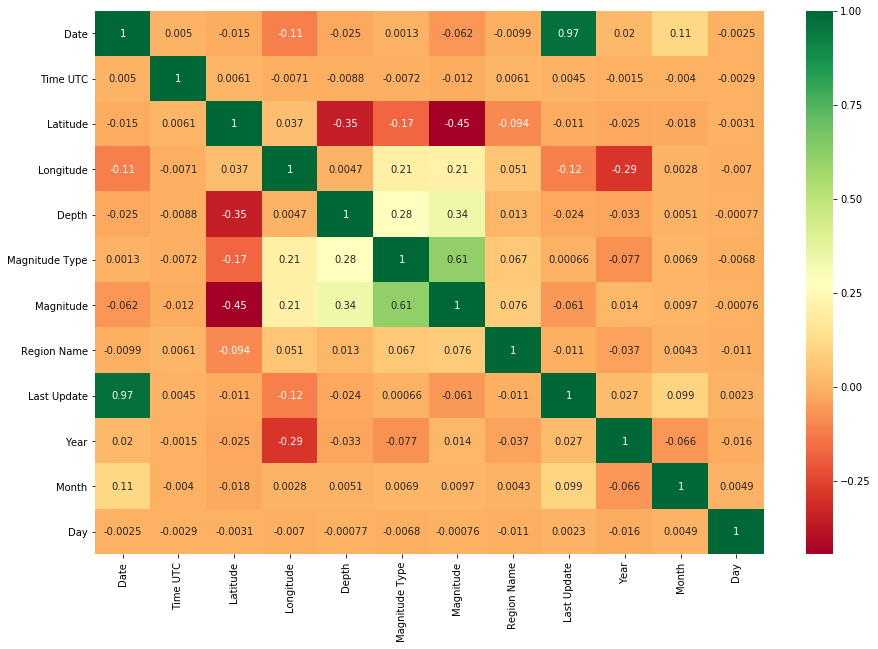

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data_for_visualization.corr(),annot=True, cmap="RdYlGn")
# fmt= '.1f'
# coolwarm

Use Column With Correlation Value >= 0,9

In [23]:
# if the correlation value = 1, remove it 

columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [24]:
# select the attribute with correlation value less than 0,9
selected_columns = data_for_visualization.columns[columns]

In [25]:
selected_columns

Index(['Date', 'Time UTC', 'Latitude', 'Longitude', 'Depth', 'Magnitude Type',
       'Magnitude', 'Region Name', 'Year', 'Month', 'Day'],
      dtype='object')

In [26]:
# We get the attribute that we will use or process
attribute_to_use = list(selected_columns)

In [27]:
print("Attribute after check correlation :", attribute_to_use)

Attribute after check correlation : ['Date', 'Time UTC', 'Latitude', 'Longitude', 'Depth', 'Magnitude Type', 'Magnitude', 'Region Name', 'Year', 'Month', 'Day']


In [28]:
# New Dataset with attribute based on attribute we get from visualization
Dataset = data_for_process[attribute_to_use]
Dataset_visual = data_for_visualization[attribute_to_use]
Data_before_transformation = Dataset
Data_visual_before_transformation = Dataset_visual

In [29]:
print("Dataset Vizualisation before Data Transformation :")
Data_visual_before_transformation

Dataset Vizualisation before Data Transformation :


,Date,Time UTC,Latitude,Longitude,Depth,Magnitude Type,Magnitude,Region Name,Year,Month,Day
0,1000,60855,19.34,-155.15,1,10,2.1,327,2019,3,13
1,1000,60550,36.93,-5.27,24,4,2.6,928,2019,3,13
2,1000,59809,37.76,14.50,10,4,2.0,834,2019,3,13
3,1000,59518,-4.86,134.01,35,15,4.2,508,2019,3,13
4,1000,58406,69.63,-144.41,10,15,4.5,584,2019,3,13
5,1000,58358,36.98,-5.28,10,4,4.0,928,2019,3,13
6,1000,56589,-28.64,-70.40,88,4,4.0,38,2019,3,13
7,1000,41454,0.11,119.74,35,15,4.3,451,2019,3,13
8,1000,40928,66.33,-157.31,10,4,2.6,584,2019,3,13
9,1000,40111,31.02,-87.26,5,15,2.3,6,2019,3,13


In [30]:
print("Dataset before Data Transformation :")
Data_before_transformation

Dataset before Data Transformation :


,Date,Time UTC,Latitude,Longitude,Depth,Magnitude Type,Magnitude,Region Name,Year,Month,Day
0,3/13/2019,3:24:48,19.34,-155.15,1,Ml,2.1,"ISLAND OF HAWAII, HAWAII",2019,3,13
1,3/13/2019,3:19:34,36.93,-5.27,24,ML,2.6,STRAIT OF GIBRALTAR,2019,3,13
2,3/13/2019,3:06:49,37.76,14.50,10,ML,2.0,"SICILY, ITALY",2019,3,13
3,3/13/2019,3:01:50,-4.86,134.01,35,mb,4.2,"NEAR S COAST OF PAPUA, INDONESIA",2019,3,13
4,3/13/2019,2:42:25,69.63,-144.41,10,mb,4.5,NORTHERN ALASKA,2019,3,13
5,3/13/2019,2:41:37,36.98,-5.28,10,ML,4.0,STRAIT OF GIBRALTAR,2019,3,13
6,3/13/2019,2:11:01,-28.64,-70.40,88,ML,4.0,"ATACAMA, CHILE",2019,3,13
7,3/13/2019,1:50:48,0.11,119.74,35,mb,4.3,"MINAHASA, SULAWESI, INDONESIA",2019,3,13
8,3/13/2019,1:41:45,66.33,-157.31,10,ML,2.6,NORTHERN ALASKA,2019,3,13
9,3/13/2019,1:27:43,31.02,-87.26,5,mb,2.3,ALABAMA,2019,3,13


In [31]:
preview_after_data_selection = Data_visual_before_transformation

In [32]:
Data_before_transformation.to_csv('Hasil Preprocessing/Data after Data Selection.csv', index = False)

## 1.2. Binning

In [33]:
# Check for attribute to binning which is attribute in new dataset with numeric values
atribut_mau_dibinning = []
for i in Dataset.columns:
    if i in attribute_numeric:
        atribut_mau_dibinning.append(i)

In [34]:
print("Attribute(s) for binning")
atribut_mau_dibinning

Attribute(s) for binning


['Latitude', 'Longitude', 'Depth', 'Magnitude', 'Year', 'Month', 'Day']

### 1.2.1. Binning Process

In [35]:
# // Binning Process //
dataframelabel = []
for att in atribut_mau_dibinning:
    atribut_name = Dataset[att]
    max_value = atribut_name.max()
    min_value = atribut_name.min()
    n = len(atribut_name)
    cbrt = n ** (1. / 3)
    data_describe = atribut_name.describe()
    Q1 = data_describe['25%']
    Q2 = data_describe['50%']
    Q3 = data_describe['75%']
    interquartile = Q3 - Q1
    
    # Bins
    bins = int(round((max_value - min_value) /  (2 *  (interquartile / cbrt))))

    # Binwidth
    binwidth = round((2 * (interquartile/cbrt)),2)
    
#     print("Length of Data =", n)
#     print("Max Value =", max_value)
#     print("Min Value =", min_value)
#     print("Cuberoot       =", cbrt)
#     print("Q1             =", Q1)
#     print("Q2             =", Q2)
#     print("Q3             =", Q3)
#     print("Interquartile  =", interquartile)
#     print("Number of Bins =", bins)
#     print("Bin Width      =", binwidth)

    # List of bins
    bins_list = []
    for bins_number in range(bins):
    #     bins_list.append("%.2f" % bins_number)
        x = bins_number * binwidth
        jumlah = round((float(max_value) - x),2)
        bins_list.append(jumlah)
    bins_list = sorted(bins_list, key=float)
    
    # List of bin label
    # bin labels
    bin_labels = []
    for label in range(int(bins)):
        value = att + ' ' +str(label)
        bin_labels.append(value)
        
    for i in range(1):
        df_label = pd.DataFrame({'Bins':bins_list,
                             'Label':bin_labels})
        
    dataframelabel.append(df_label)
    
    DataFrameBin = pd.DataFrame({'Bin': bins_list})
    
    # Binning Process
    # select value with header
    data_list = [('nums', Dataset[att])]

    # # Create the labels for the bin
    # bin_labels = ['Lat1','Lat2','Lat3','Lat4','Lat5','Lat6','Lat7','Lat8','Lat9']

    # Create the dataframe object using the data_list
    df = pd.DataFrame.from_dict(collections.OrderedDict(data_list))



    # Define the scope of the bins
    # ['bound1' , 'bound2' = 1]
    # ['bound2' , 'bound3' = 2]
    # ['bound3' , 'bound4' = 3]
    # ['bound4' , 'bound5' = 4]

    # bins = [bound1, bound2, bound3, bound4, bound5]

    # Create the "bins" column using the cut function
    df[att + '_bins'] = pd.cut(df['nums'], bins=bins, labels=bin_labels)
    
    del Dataset[att]
    Dataset[att + '_bins'] = df[att + '_bins']

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### 1.2.2. Label of Binning

In [36]:
LabelValue = []
BinsValue = []
for i in dataframelabel:
    for j in i.values:
        BinsValue.append(j[0])
        LabelValue.append(j[1])

In [37]:
BinsDataFrame = pd.DataFrame({'Bins' : BinsValue,
                       'Label': LabelValue})

In [38]:
len(BinsDataFrame)

1732

In [39]:
for f in range(len(atribut_mau_dibinning)):
    g = dataframelabel[f]
    g.to_csv('Hasil Preprocessing/Nilai Binning %s.csv' %(f), index = False)

In [40]:
ListOfDictOfBinning = []
for i in range(len(BinsDataFrame)):
    x = {}
    x['Bins'] = BinsDataFrame['Bins'][i]
    x['Label'] = BinsDataFrame['Label'][i]
    ListOfDictOfBinning.append(x)

In [41]:
ListOfDictOfBinning

[{'Bins': -78.59, 'Label': 'Latitude 0'},
 {'Bins': -77.93, 'Label': 'Latitude 1'},
 {'Bins': -77.27, 'Label': 'Latitude 2'},
 {'Bins': -76.61, 'Label': 'Latitude 3'},
 {'Bins': -75.95, 'Label': 'Latitude 4'},
 {'Bins': -75.29, 'Label': 'Latitude 5'},
 {'Bins': -74.63, 'Label': 'Latitude 6'},
 {'Bins': -73.97, 'Label': 'Latitude 7'},
 {'Bins': -73.31, 'Label': 'Latitude 8'},
 {'Bins': -72.65, 'Label': 'Latitude 9'},
 {'Bins': -71.99, 'Label': 'Latitude 10'},
 {'Bins': -71.33, 'Label': 'Latitude 11'},
 {'Bins': -70.67, 'Label': 'Latitude 12'},
 {'Bins': -70.01, 'Label': 'Latitude 13'},
 {'Bins': -69.35, 'Label': 'Latitude 14'},
 {'Bins': -68.69, 'Label': 'Latitude 15'},
 {'Bins': -68.03, 'Label': 'Latitude 16'},
 {'Bins': -67.37, 'Label': 'Latitude 17'},
 {'Bins': -66.71, 'Label': 'Latitude 18'},
 {'Bins': -66.05, 'Label': 'Latitude 19'},
 {'Bins': -65.39, 'Label': 'Latitude 20'},
 {'Bins': -64.73, 'Label': 'Latitude 21'},
 {'Bins': -64.07, 'Label': 'Latitude 22'},
 {'Bins': -63.41, 'La

## 1.3. Labelling

In [42]:
# Check for attribute to labeled which is attribute in new dataset with nominal values
atribut_mau_dilabel = []
for att_mau_dilabel in Dataset.columns:
    if att_mau_dilabel in attribute_nominal:
        atribut_mau_dilabel.append(att_mau_dilabel)

In [43]:
atribut_mau_dilabel

['Date', 'Time UTC', 'Magnitude Type', 'Region Name']

### 1.3.1. Labelling Process

In [44]:
# // Labeling Process //
for atribut_label in atribut_mau_dilabel:
    Dataset[atribut_label] = atribut_label + ' ' + Dataset[atribut_label].astype(str)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [45]:
Dataset = Dataset

## Dataset Ready to Process

In [46]:
print("Dataset for Process")
Dataset

Dataset for Process


,Date,Time UTC,Magnitude Type,Region Name,Latitude_bins,Longitude_bins,Depth_bins,Magnitude_bins,Year_bins,Month_bins,Day_bins
0,Date 3/13/2019,Time UTC 3:24:48,Magnitude Type Ml,"Region Name ISLAND OF HAWAII, HAWAII",Latitude 148,Longitude 6,Depth 6,Magnitude 33,Year 49,Month 11,Day 26
1,Date 3/13/2019,Time UTC 3:19:34,Magnitude Type ML,Region Name STRAIT OF GIBRALTAR,Latitude 175,Longitude 46,Depth 37,Magnitude 46,Year 49,Month 11,Day 26
2,Date 3/13/2019,Time UTC 3:06:49,Magnitude Type ML,"Region Name SICILY, ITALY",Latitude 176,Longitude 51,Depth 18,Magnitude 31,Year 49,Month 11,Day 26
3,Date 3/13/2019,Time UTC 3:01:50,Magnitude Type mb,"Region Name NEAR S COAST OF PAPUA, INDONESIA",Latitude 111,Longitude 82,Depth 52,Magnitude 87,Year 49,Month 11,Day 26
4,Date 3/13/2019,Time UTC 2:42:25,Magnitude Type mb,Region Name NORTHERN ALASKA,Latitude 225,Longitude 9,Depth 18,Magnitude 95,Year 49,Month 11,Day 26
5,Date 3/13/2019,Time UTC 2:41:37,Magnitude Type ML,Region Name STRAIT OF GIBRALTAR,Latitude 175,Longitude 46,Depth 18,Magnitude 82,Year 49,Month 11,Day 26
6,Date 3/13/2019,Time UTC 2:11:01,Magnitude Type ML,"Region Name ATACAMA, CHILE",Latitude 75,Longitude 28,Depth 123,Magnitude 82,Year 49,Month 11,Day 26
7,Date 3/13/2019,Time UTC 1:50:48,Magnitude Type mb,"Region Name MINAHASA, SULAWESI, INDONESIA",Latitude 119,Longitude 79,Depth 52,Magnitude 90,Year 49,Month 11,Day 26
8,Date 3/13/2019,Time UTC 1:41:45,Magnitude Type ML,Region Name NORTHERN ALASKA,Latitude 220,Longitude 5,Depth 18,Magnitude 46,Year 49,Month 11,Day 26
9,Date 3/13/2019,Time UTC 1:27:43,Magnitude Type mb,Region Name ALABAMA,Latitude 166,Longitude 24,Depth 12,Magnitude 38,Year 49,Month 11,Day 26


In [47]:
preview_after_data_transformation = Dataset

In [48]:
Dataset.to_csv('Hasil Preprocessing/Data after Data Preprocessing.csv', index = False)

# 2. Rules Mining [ FP-Growth Algorithm ]

## 2.1. Frequent Pattern Mining

In [49]:
# The data set to an array
data = Dataset.values.tolist()
# data = Dataset.T.apply(lambda x: x.dropna().tolist()).tolist()

if len(Dataset) <= 200:
    minsup = 2
else:
    minsup = round(0.01 * len(Dataset))
    
FrequentPattern = pyfpgrowth.find_frequent_patterns(data, minsup)

In [50]:
FrequentFrame = pd.DataFrame(list(FrequentPattern.items()), columns=['Itemsets', 'support'])

In [51]:
print("Frequent Pattern")
FrequentFrame

Frequent Pattern


,Itemsets,support
0,"(Longitude 8,)",3069
1,"(Region Name SOUTHERN ALASKA,)",3160
2,"(Longitude 59,)",3178
3,"(Latitude 143,)",3198
4,"(Depth 59,)",3238
5,"(Latitude 171,)",3320
6,"(Longitude 49,)",3410
7,"(Longitude 49, Magnitude Type ML)",3252
8,"(Latitude 183,)",3416
9,"(Region Name NORTHERN CALIFORNIA,)",3421


In [52]:
FrequentFrame.to_csv('Hasil Penambangan FP-Growth/Frequent Pattern.csv' ,index=False)

## 2.2. Closed Pattern Mining

In [53]:
# Mining Closed Pattern Function
def issubset(a,b):
    for x in a:
        if x not in b:
            return False
    return True

dictionary = {}

In [54]:
def close_pattern(freq_pattern):
    satu = []
    for a,b in freq_pattern.items():
        w = a
        flag = False
        for i,j in freq_pattern.items():
            if a!=i and i not in satu:
                #print(a,b,i,j)
                if issubset(a,i) and b == j:
                    flag = True
                    break
        #print(flag)
        if flag == False:
            dictionary[w] = b
        satu.append(w)

    return dictionary

In [55]:
# Mining Closed Pattern Process
ClosedPattern = close_pattern(FrequentPattern)
ClosedFrame = pd.DataFrame(list(ClosedPattern.items()), columns=['Itemset', 'Support'])

In [56]:
print("Closed Pattern")
ClosedFrame

Closed Pattern


,Itemset,Support
0,"(Longitude 8,)",3069
1,"(Region Name SOUTHERN ALASKA,)",3160
2,"(Longitude 59,)",3178
3,"(Latitude 143,)",3198
4,"(Depth 59,)",3238
5,"(Latitude 171,)",3320
6,"(Longitude 49,)",3410
7,"(Longitude 49, Magnitude Type ML)",3252
8,"(Latitude 183,)",3416
9,"(Region Name NORTHERN CALIFORNIA,)",3421


In [57]:
ClosedFrame.to_csv('Hasil Penambangan FP-Growth/Closed Pattern.csv', index=False)

## 2.3. Association Rules Mining

### 2.3.1. Mining Association Rules

In [58]:
AssociationRules = pyfpgrowth.generate_association_rules(ClosedPattern, 0.8)

In [59]:
AssociationRules

{('Longitude 49',): (('Magnitude Type ML',), 0.9536656891495601),
 ('Magnitude 106',): (('Magnitude Type mb',), 0.8891441700172314),
 ('Longitude 29', 'Region Name TARAPACA, CHILE'): (('Magnitude Type ML',),
  0.9226096143687269),
 ('Magnitude Type ML', 'Region Name TARAPACA, CHILE'): (('Longitude 29',),
  0.971357063403782),
 ('Region Name AEGEAN SEA',): (('Magnitude Type ML',), 0.9910805300713558),
 ('Magnitude 103',): (('Magnitude Type mb',), 0.8866862457170828),
 ('Longitude 53', 'Region Name SOUTHERN GREECE'): (('Magnitude Type ML',),
  0.9828087167070217),
 ('Magnitude Type ML', 'Region Name SOUTHERN GREECE'): (('Longitude 53',),
  0.9950968374601618),
 ('Longitude 52',
  'Region Name IONIAN SEA'): (('Latitude 176',
   'Magnitude Type ML'), 0.8624432104997476),
 ('Magnitude Type ML', 'Region Name IONIAN SEA'): (('Latitude 176',),
  0.8808813403718154),
 ('Latitude 176', 'Longitude 52'): (('Magnitude Type ML',),
  0.9699120068123758),
 ('Latitude 176',
  'Longitude 52',
  'Magnitu

### 2.3.2. Separate Rules to Antecedence, Consequent and Antecedence Join Consequent

In [60]:
# // Create new dataframe for Association Rules //

# Separate Association Rules Items ( 'Antecedence', 'Consequent', 'Confidence', 'Antecedence U Consequent')
ante = []
conse = []
anteconse = []
confi = []
for key, value in AssociationRules.items():
    TempKey = []
    TempValue = []
    SortedKey = sorted(key)
    SortedValue = sorted(value[0])
    for itemkey in SortedKey:
        TempKey.append(itemkey)
    for itemvalue in SortedValue:
        TempValue.append(itemvalue)
        
    ante.append(tuple(TempKey))
    conse.append(tuple(TempValue))
    confi.append(value[1])

for i in range(len(ante)):
    combine = (tuple(ante[i]+conse[i]))
    anteconse.append(combine)

### 2.3.3. Function to Count Support

In [61]:
ListDataset = Dataset.values.tolist()

In [62]:
def CountItem(item):
    sums = 0
    for i in ListDataset:
        flag = True
        for x in item:
            if x not in i:
                flag = False
                break
        if flag == True:
            sums += 1
    return sums

In [63]:
def CheckSupport(ListItems):
    support = []
    for i in ListItems:
        support.append(CountItem(i))
    return support

In [64]:
AssociationRules

{('Longitude 49',): (('Magnitude Type ML',), 0.9536656891495601),
 ('Magnitude 106',): (('Magnitude Type mb',), 0.8891441700172314),
 ('Longitude 29', 'Region Name TARAPACA, CHILE'): (('Magnitude Type ML',),
  0.9226096143687269),
 ('Magnitude Type ML', 'Region Name TARAPACA, CHILE'): (('Longitude 29',),
  0.971357063403782),
 ('Region Name AEGEAN SEA',): (('Magnitude Type ML',), 0.9910805300713558),
 ('Magnitude 103',): (('Magnitude Type mb',), 0.8866862457170828),
 ('Longitude 53', 'Region Name SOUTHERN GREECE'): (('Magnitude Type ML',),
  0.9828087167070217),
 ('Magnitude Type ML', 'Region Name SOUTHERN GREECE'): (('Longitude 53',),
  0.9950968374601618),
 ('Longitude 52',
  'Region Name IONIAN SEA'): (('Latitude 176',
   'Magnitude Type ML'), 0.8624432104997476),
 ('Magnitude Type ML', 'Region Name IONIAN SEA'): (('Latitude 176',),
  0.8808813403718154),
 ('Latitude 176', 'Longitude 52'): (('Magnitude Type ML',),
  0.9699120068123758),
 ('Latitude 176',
  'Longitude 52',
  'Magnitu

In [65]:
separate_ante = []
separate_conse = []
for key, value in AssociationRules.items():
    separate_ante.append(key)
    separate_conse.append(value[0])
    
RulesForGA = dict(zip(separate_ante, separate_conse))

In [66]:
RulesForGA

{('Longitude 49',): ('Magnitude Type ML',),
 ('Magnitude 106',): ('Magnitude Type mb',),
 ('Longitude 29', 'Region Name TARAPACA, CHILE'): ('Magnitude Type ML',),
 ('Magnitude Type ML', 'Region Name TARAPACA, CHILE'): ('Longitude 29',),
 ('Region Name AEGEAN SEA',): ('Magnitude Type ML',),
 ('Magnitude 103',): ('Magnitude Type mb',),
 ('Longitude 53', 'Region Name SOUTHERN GREECE'): ('Magnitude Type ML',),
 ('Magnitude Type ML', 'Region Name SOUTHERN GREECE'): ('Longitude 53',),
 ('Longitude 52', 'Region Name IONIAN SEA'): ('Latitude 176',
  'Magnitude Type ML'),
 ('Magnitude Type ML', 'Region Name IONIAN SEA'): ('Latitude 176',),
 ('Latitude 176', 'Longitude 52'): ('Magnitude Type ML',),
 ('Latitude 176',
  'Longitude 52',
  'Magnitude Type ML'): ('Region Name IONIAN SEA',),
 ('Latitude 176',
  'Longitude 52',
  'Region Name IONIAN SEA'): ('Magnitude Type ML',),
 ('Latitude 176',
  'Magnitude Type ML',
  'Region Name IONIAN SEA'): ('Longitude 52',),
 ('Longitude 52',
  'Magnitude Type

In [67]:
def FindAntecedence(Rules):
    ante = []
    for key, value in Rules.items():
        TempKey = []
        TempValue = []
        SortedKey = sorted(key)
        SortedValue = sorted(value)

        for itemkey in SortedKey:
            TempKey.append(itemkey)

        for itemvalue in SortedValue:
            TempValue.append(itemvalue)

        ante.append(tuple(TempKey))

    return ante
    
def FindConsequent(Rules):
    conse = []
    for key, value in Rules.items():
        TempKey = []
        TempValue = []
        SortedKey = sorted(key)
        SortedValue = sorted(value)

        for itemkey in SortedKey:
            TempKey.append(itemkey)

        for itemvalue in SortedValue:
            TempValue.append(itemvalue)

        conse.append(tuple(TempValue))

    return conse
    
def FindAntecedenceConsequent(Rules):
    # // Create new dataframe for Association Rules //

    # Separate Association Rules Items ( 'Antecedence', 'Consequent', 'Confidence', 'Antecedence U Consequent')
    ante = []
    conse = []
    anteconse = []
    for key, value in Rules.items():
        TempKey = []
        TempValue = []
        SortedKey = sorted(key)
        SortedValue = sorted(value)
        for itemkey in SortedKey:
            TempKey.append(itemkey)
        for itemvalue in SortedValue:
            TempValue.append(itemvalue)

        ante.append(tuple(TempKey))
        conse.append(tuple(TempValue))

    for i in range(len(ante)):
        combine = (tuple(ante[i]+conse[i]))
        anteconse.append(combine)

    return anteconse

def FindAnteConse(Rules):
    # // Create new dataframe for Association Rules //

    # Separate Association Rules Items ( 'Antecedence', 'Consequent', 'Confidence', 'Antecedence U Consequent')
    ante = []
    conse = []
        
    for key, value in Rules.items():
        ante.append(sorted(key))
        conse.append(sorted(value))
            
    result = []
    for i in range(len(ante)):
        Temp = 'If %s, Then %s' %(ante[i], conse[i])
        result.append(Temp)
            
    return result

In [68]:
def Encode(list_of_rules):
    encode = []
    for i in list_of_rules:
        temp = []
        for j in semua_nilai_dari_atribut:
            if j in i[0]:
                temp.append('00')
            elif j in i[1]:
                temp.append('11')
            else:
                temp.append('01')
        encode.append(temp)
    return encode

def RouletteWheel(Individu):
    maxi = sum(Individu.values())
    pick = random.uniform(0, maxi)
    current = 0
    for key, value in Individu.items():
        current += value
        if current > pick:
            return key
        
def Encode(list_of_rules):
    encode = []
    for i in list_of_rules:
        temp = []
        for j in semua_nilai_dari_atribut:
            if j in i[0]:
                temp.append('00')
            elif j in i[1]:
                temp.append('11')
            else:
                temp.append('01')
        encode.append(temp)
    return encode

def CheckRules(list_encode ,role, index):
    return list_encode[index][role]

def CountAnteConse(list_encode, role, index):
    value = list_encode[index].count(role)
    return value

# def Crossover(list_of_encode):
#     side_a = []
#     side_b = []
#     for i in list_of_encode:
#         side_a.append(i)

#     for i in list_of_encode:
#         side_b.append(i)
        
# #     RandomPointSideA = random.sample(range(0, len(side_a)), len(side_a))
# #     RandomPointSideB = random.sample(range(0, len(side_b)), len(side_b))

    
#     Couple = []
#     for i in range(len(side_a)):
#         RandomPoint = random.sample(range(0, len(side_a)), 2)
#         Couple.append(RandomPoint)
    
#     RandomA = []
#     RandomB = []
#     for i in range(len(side_a)):
#         RandomA.append(Couple[i][0])
#         RandomB.append(Couple[i][1])   
        
#     ListEncodeByRandomA = [list_of_encode[i] for i in RandomA]
#     ListEncodeByRandomB = [list_of_encode[i] for i in RandomB]
    
#     crossover = tuple(zip(ListEncodeByRandomA, ListEncodeByRandomB))
    
#     # Make a cutpoint
#     TwoPoint = []
#     for i in range(len(crossover)):
#         RandomPoint = random.sample(range(1, len(crossover[0][0])), 2)
#         TwoPoint.append(sorted(RandomPoint))
    
#     crossover_update = []
#     const = len(crossover[0][0])
#     for i in range(len(crossover)):
#         left,right = [],[]
#         for x in range(0, TwoPoint[i][0]):
#             left.append(crossover[i][0][x])
#             right.append(crossover[i][1][x])
#         for q in range(TwoPoint[i][0], TwoPoint[i][1]):
#             left.append(crossover[i][1][q])
#             right.append(crossover[i][0][q])
#         for k in range(TwoPoint[i][1], const):
#             left.append(crossover[i][0][k])
#             right.append(crossover[i][1][k])
#         crossover_update.append(left)
#         crossover_update.append(right)
#     return crossover_update

def ListOfMutationPoints(Offspring, MutationProbability):
    ListOfMutationPoint = []
    for i in range(len(Offspring)):
        RandomValue = random.sample(range(0, len(Offspring[0])), MutationProbability)
        ListOfMutationPoint.append(RandomValue)
    return ListOfMutationPoint

def Decode(list_of_encode):
    decode = {}
    for i in range(len(list_of_encode)):
        ante_decode = []
        conse_decode = []
        for j in range(len(list_of_encode[i])):
            if list_of_encode[i][j] == '00':
                ante_decode.append(semua_nilai_dari_atribut[j])
            elif list_of_encode[i][j] == '11':
                conse_decode.append(semua_nilai_dari_atribut[j])
        result_ante = tuple(ante_decode)
        result_conse = tuple(conse_decode)
        decode[result_ante] = result_conse
    return decode

In [69]:
AssosiationFrame = pd.DataFrame({'Rules': FindAnteConse(RulesForGA),
                                          'Antecedence': FindAntecedence(RulesForGA) ,
                                          'Consequent': FindConsequent(RulesForGA) ,
                                          'sup(A)': CheckSupport(FindAntecedence(RulesForGA)),
                                          'sup(B)' : CheckSupport(FindConsequent(RulesForGA)),
                                          'sup(A U B)' : CheckSupport(FindAntecedenceConsequent(RulesForGA))
                                        })

AssosiationFrame['Kulczynski'] = round((AssosiationFrame['sup(A U B)'] / 2) * ( ( 1/AssosiationFrame['sup(A)'] ) +  ( 1/AssosiationFrame['sup(B)'] )), 4)
AssosiationFrame['IR'] = (abs(AssosiationFrame['sup(A)'] - AssosiationFrame['sup(B)'])) / (AssosiationFrame['sup(A)'] + AssosiationFrame['sup(B)'] - AssosiationFrame['sup(A U B)'])
AssosiationFrame = AssosiationFrame.sort_values('Kulczynski', ascending=False)
AssosiationFrame = AssosiationFrame[AssosiationFrame['sup(A)'] >= minsup]
AssosiationFrame = AssosiationFrame[AssosiationFrame['sup(B)'] >= minsup]
AssosiationFrame = AssosiationFrame[AssosiationFrame['sup(A U B)'] >= minsup]

In [70]:
AssosiationFrame.to_csv('Hasil Optimasi/Rules Awal.csv', index = False)
AssosiationFrame.to_csv('Hasil Penambangan FP-Growth/Association Rules FP-Growth.csv', index = False)

In [71]:
AssosiationFrame

,Rules,Antecedence,Consequent,sup(A),sup(B),sup(A U B),Kulczynski,IR
11,"If ['Latitude 176', 'Longitude 52', 'Magnitude...","(Latitude 176, Longitude 52, Magnitude Type ML)","(Region Name IONIAN SEA,)",3417,4496,3417,0.8800,0.239991
264,"If ['Longitude 6', 'Region Name ISLAND OF HAWA...","(Longitude 6, Region Name ISLAND OF HAWAII, HA...","(Latitude 148,)",27976,34573,27191,0.8792,0.186577
260,"If ['Latitude 148', 'Longitude 6', 'Magnitude ...","(Latitude 148, Longitude 6, Magnitude Type ML,...","(Region Name ISLAND OF HAWAII, HAWAII,)",21162,27976,20866,0.8659,0.241016
250,"If ['Longitude 6', 'Year 41'], Then ['Latitude...","(Longitude 6, Year 41)","(Latitude 148,)",25897,34573,25152,0.8494,0.245654
253,"If ['Longitude 6', 'Region Name ISLAND OF HAWA...","(Longitude 6, Region Name ISLAND OF HAWAII, HA...","(Latitude 148,)",24930,34573,24576,0.8483,0.276090
258,"If ['Latitude 148', 'Magnitude Type ML', 'Year...","(Latitude 148, Magnitude Type ML, Year 41)","(Longitude 6,)",21480,30265,21162,0.8422,0.287251
40,"If ['Latitude 184', 'Longitude 50', 'Magnitude...","(Latitude 184, Longitude 50, Magnitude Type ML)","(Region Name CENTRAL ITALY,)",4368,6920,4368,0.8156,0.368786
251,"If ['Longitude 6', 'Magnitude Type ML', 'Regio...","(Longitude 6, Magnitude Type ML, Region Name I...","(Latitude 148,)",22795,34573,22309,0.8120,0.335948
262,"If ['Longitude 6', 'Magnitude Type ML', 'Regio...","(Longitude 6, Magnitude Type ML, Region Name I...","(Latitude 148,)",21115,34573,20866,0.7959,0.386480
252,"If ['Longitude 6', 'Magnitude Type ML', 'Year ...","(Longitude 6, Magnitude Type ML, Year 41)","(Latitude 148,)",21652,34573,21162,0.7947,0.368508


In [72]:
semua_nilai_dari_atribut = []
for nama_kolom in Dataset.columns:
    temp_data = sorted(Dataset[nama_kolom].unique())
    semua_nilai_dari_atribut.extend(temp_data)

# ! INPUT FOR GA

In [73]:
RulesForGA

{('Longitude 49',): ('Magnitude Type ML',),
 ('Magnitude 106',): ('Magnitude Type mb',),
 ('Longitude 29', 'Region Name TARAPACA, CHILE'): ('Magnitude Type ML',),
 ('Magnitude Type ML', 'Region Name TARAPACA, CHILE'): ('Longitude 29',),
 ('Region Name AEGEAN SEA',): ('Magnitude Type ML',),
 ('Magnitude 103',): ('Magnitude Type mb',),
 ('Longitude 53', 'Region Name SOUTHERN GREECE'): ('Magnitude Type ML',),
 ('Magnitude Type ML', 'Region Name SOUTHERN GREECE'): ('Longitude 53',),
 ('Longitude 52', 'Region Name IONIAN SEA'): ('Latitude 176',
  'Magnitude Type ML'),
 ('Magnitude Type ML', 'Region Name IONIAN SEA'): ('Latitude 176',),
 ('Latitude 176', 'Longitude 52'): ('Magnitude Type ML',),
 ('Latitude 176',
  'Longitude 52',
  'Magnitude Type ML'): ('Region Name IONIAN SEA',),
 ('Latitude 176',
  'Longitude 52',
  'Region Name IONIAN SEA'): ('Magnitude Type ML',),
 ('Latitude 176',
  'Magnitude Type ML',
  'Region Name IONIAN SEA'): ('Longitude 52',),
 ('Longitude 52',
  'Magnitude Type

In [74]:
AssosiationRulesDataFrameForGA = pd.DataFrame({'Rules': FindAnteConse(RulesForGA),
                                          'Antecedence': FindAntecedence(RulesForGA) ,
                                          'Consequent': FindConsequent(RulesForGA) ,
                                          'sup(A)': CheckSupport(FindAntecedence(RulesForGA)),
                                          'sup(B)' : CheckSupport(FindConsequent(RulesForGA)),
                                          'sup(A U B)' : CheckSupport(FindAntecedenceConsequent(RulesForGA))
                                        })

AssosiationRulesDataFrameForGA['Kulczynski'] = round((AssosiationRulesDataFrameForGA['sup(A U B)'] / 2) * ( ( 1/AssosiationRulesDataFrameForGA['sup(A)'] ) +  ( 1/AssosiationRulesDataFrameForGA['sup(B)'] )), 4)
AssosiationRulesDataFrameForGA['IR'] = (abs(AssosiationRulesDataFrameForGA['sup(A)'] - AssosiationRulesDataFrameForGA['sup(B)'])) / (AssosiationRulesDataFrameForGA['sup(A)'] + AssosiationRulesDataFrameForGA['sup(B)'] - AssosiationRulesDataFrameForGA['sup(A U B)'])
AssosiationRulesDataFrameForGA = AssosiationRulesDataFrameForGA.sort_values('Kulczynski', ascending=False)
AssosiationRulesDataFrameForGA = AssosiationRulesDataFrameForGA[AssosiationRulesDataFrameForGA['sup(A)'] >= minsup]
AssosiationRulesDataFrameForGA = AssosiationRulesDataFrameForGA[AssosiationRulesDataFrameForGA['sup(B)'] >= minsup]
AssosiationRulesDataFrameForGA = AssosiationRulesDataFrameForGA[AssosiationRulesDataFrameForGA['sup(A U B)'] >= minsup]

In [75]:
AssosiationRulesDataFrameForGA

,Rules,Antecedence,Consequent,sup(A),sup(B),sup(A U B),Kulczynski,IR
11,"If ['Latitude 176', 'Longitude 52', 'Magnitude...","(Latitude 176, Longitude 52, Magnitude Type ML)","(Region Name IONIAN SEA,)",3417,4496,3417,0.8800,0.239991
264,"If ['Longitude 6', 'Region Name ISLAND OF HAWA...","(Longitude 6, Region Name ISLAND OF HAWAII, HA...","(Latitude 148,)",27976,34573,27191,0.8792,0.186577
260,"If ['Latitude 148', 'Longitude 6', 'Magnitude ...","(Latitude 148, Longitude 6, Magnitude Type ML,...","(Region Name ISLAND OF HAWAII, HAWAII,)",21162,27976,20866,0.8659,0.241016
250,"If ['Longitude 6', 'Year 41'], Then ['Latitude...","(Longitude 6, Year 41)","(Latitude 148,)",25897,34573,25152,0.8494,0.245654
253,"If ['Longitude 6', 'Region Name ISLAND OF HAWA...","(Longitude 6, Region Name ISLAND OF HAWAII, HA...","(Latitude 148,)",24930,34573,24576,0.8483,0.276090
258,"If ['Latitude 148', 'Magnitude Type ML', 'Year...","(Latitude 148, Magnitude Type ML, Year 41)","(Longitude 6,)",21480,30265,21162,0.8422,0.287251
40,"If ['Latitude 184', 'Longitude 50', 'Magnitude...","(Latitude 184, Longitude 50, Magnitude Type ML)","(Region Name CENTRAL ITALY,)",4368,6920,4368,0.8156,0.368786
251,"If ['Longitude 6', 'Magnitude Type ML', 'Regio...","(Longitude 6, Magnitude Type ML, Region Name I...","(Latitude 148,)",22795,34573,22309,0.8120,0.335948
262,"If ['Longitude 6', 'Magnitude Type ML', 'Regio...","(Longitude 6, Magnitude Type ML, Region Name I...","(Latitude 148,)",21115,34573,20866,0.7959,0.386480
252,"If ['Longitude 6', 'Magnitude Type ML', 'Year ...","(Longitude 6, Magnitude Type ML, Year 41)","(Latitude 148,)",21652,34573,21162,0.7947,0.368508


In [76]:
KulcValue = AssosiationRulesDataFrameForGA['Kulczynski']

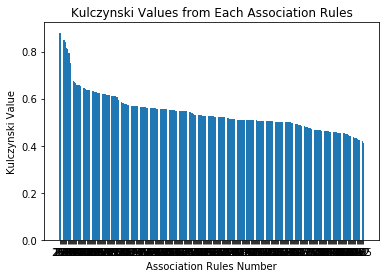

In [77]:
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = KulcValue
bars = KulcValue.index.values
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
# Add title and axis names
plt.title('Kulczynski Values from Each Association Rules')
plt.xlabel('Association Rules Number')
plt.ylabel('Kulczynski Value')

 
# Create names on the x-axis
plt.xticks(y_pos, bars)
# Show graphic
plt.show()
 

In [78]:
CrossOverProbability = 0.8
MutationProbability = 0.01

In [79]:
BestAssociationRulesDataFrame = AssosiationRulesDataFrameForGA

In [80]:
constanta = len(AssociationRules)

In [81]:
constanta

273

In [82]:
BestAssociationRulesDataFrame

,Rules,Antecedence,Consequent,sup(A),sup(B),sup(A U B),Kulczynski,IR
11,"If ['Latitude 176', 'Longitude 52', 'Magnitude...","(Latitude 176, Longitude 52, Magnitude Type ML)","(Region Name IONIAN SEA,)",3417,4496,3417,0.8800,0.239991
264,"If ['Longitude 6', 'Region Name ISLAND OF HAWA...","(Longitude 6, Region Name ISLAND OF HAWAII, HA...","(Latitude 148,)",27976,34573,27191,0.8792,0.186577
260,"If ['Latitude 148', 'Longitude 6', 'Magnitude ...","(Latitude 148, Longitude 6, Magnitude Type ML,...","(Region Name ISLAND OF HAWAII, HAWAII,)",21162,27976,20866,0.8659,0.241016
250,"If ['Longitude 6', 'Year 41'], Then ['Latitude...","(Longitude 6, Year 41)","(Latitude 148,)",25897,34573,25152,0.8494,0.245654
253,"If ['Longitude 6', 'Region Name ISLAND OF HAWA...","(Longitude 6, Region Name ISLAND OF HAWAII, HA...","(Latitude 148,)",24930,34573,24576,0.8483,0.276090
258,"If ['Latitude 148', 'Magnitude Type ML', 'Year...","(Latitude 148, Magnitude Type ML, Year 41)","(Longitude 6,)",21480,30265,21162,0.8422,0.287251
40,"If ['Latitude 184', 'Longitude 50', 'Magnitude...","(Latitude 184, Longitude 50, Magnitude Type ML)","(Region Name CENTRAL ITALY,)",4368,6920,4368,0.8156,0.368786
251,"If ['Longitude 6', 'Magnitude Type ML', 'Regio...","(Longitude 6, Magnitude Type ML, Region Name I...","(Latitude 148,)",22795,34573,22309,0.8120,0.335948
262,"If ['Longitude 6', 'Magnitude Type ML', 'Regio...","(Longitude 6, Magnitude Type ML, Region Name I...","(Latitude 148,)",21115,34573,20866,0.7959,0.386480
252,"If ['Longitude 6', 'Magnitude Type ML', 'Year ...","(Longitude 6, Magnitude Type ML, Year 41)","(Latitude 148,)",21652,34573,21162,0.7947,0.368508


In [83]:
for step in range(1, 501):    
    # Data Yang Mau Diolah Masuk
    BestAssociationRulesDataFrame
    AssosiationRulesDataFrameForGA = pd.DataFrame({'Rules': FindAnteConse(RulesForGA),
                                          'Antecedence': FindAntecedence(RulesForGA) ,
                                          'Consequent': FindConsequent(RulesForGA) ,
                                          'sup(A)': CheckSupport(FindAntecedence(RulesForGA)),
                                          'sup(B)' : CheckSupport(FindConsequent(RulesForGA)),
                                          'sup(A U B)' : CheckSupport(FindAntecedenceConsequent(RulesForGA))
                                        })

    AssosiationRulesDataFrameForGA['Kulczynski'] = round((AssosiationRulesDataFrameForGA['sup(A U B)'] / 2) * ( ( 1/AssosiationRulesDataFrameForGA['sup(A)'] ) +  ( 1/AssosiationRulesDataFrameForGA['sup(B)'] )), 4)
    AssosiationRulesDataFrameForGA['IR'] = (abs(AssosiationRulesDataFrameForGA['sup(A)'] - AssosiationRulesDataFrameForGA['sup(B)'])) / (AssosiationRulesDataFrameForGA['sup(A)'] + AssosiationRulesDataFrameForGA['sup(B)'] - AssosiationRulesDataFrameForGA['sup(A U B)'])
    AssosiationRulesDataFrameForGA = AssosiationRulesDataFrameForGA.sort_values('Kulczynski', ascending=False)
    AssosiationRulesDataFrameForGA = AssosiationRulesDataFrameForGA[AssosiationRulesDataFrameForGA['sup(A)'] >= minsup]
    AssosiationRulesDataFrameForGA = AssosiationRulesDataFrameForGA[AssosiationRulesDataFrameForGA['sup(B)'] >= minsup]
    AssosiationRulesDataFrameForGA = AssosiationRulesDataFrameForGA[AssosiationRulesDataFrameForGA['sup(A U B)'] >= minsup]
    
    # Hitung Fitness
    fitness = []
    for i in AssosiationRulesDataFrameForGA['Kulczynski']:
        value = float((("{:.6f}".format(i))))
        fitness.append(value)
    fitness = sorted(fitness, reverse=True)
    
    # Hitung total fitness
    total_fitness = round(sum(fitness),6)
    
    # Fitness Individu / Fitness Total
    fitness_per_total = []
    for i in fitness:
        temp = (round((i / total_fitness),6))
        fitness_per_total.append(temp)
    
    # Fitness Individu / Fitness Total displayed on DataFrame
    Fitness_DataFrame = pd.DataFrame({'Fitness Value': fitness,
                    'Total Fitness': total_fitness,
                    'Result': fitness_per_total})
    
    # Give ID for each fitness value
    IndexIndividual = []
    for i in range(len(fitness_per_total)):
        IndexIndividual.append(i)
    
    # ID and fitness to dict
    BeginningIndividual = dict(zip(IndexIndividual, fitness_per_total))
    
    # =============================================== SELECTION =============================================== 
    # Do Roulette Wheel
    RouletteResult = []
    for i in range(len(fitness)):
        temp = RouletteWheel(BeginningIndividual)
        if temp not in RouletteResult:
            RouletteResult.append(temp)
            
    IndividualValue = round(len(RouletteResult) * CrossOverProbability)

    # Update IndividualValue, If odd, IndividualValue - 1
    if IndividualValue % 2 == 0:
        IndividualValue = IndividualValue
    else:
        IndividualValue = IndividualValue - 1
    IndividualValue
    
    # Take some individu from RouletteResult based on IndividualValue
    RoulettePosition = RouletteResult[:IndividualValue]
    
    
    ListOfAntecedence = AssosiationRulesDataFrameForGA['Antecedence']
    ListOfConsequent  = AssosiationRulesDataFrameForGA['Consequent']
    
    ListAntecedence = []
    for i in ListOfAntecedence:
        ListAntecedence.append(i)

    ListConsequent = []
    for i in ListOfConsequent:
        ListConsequent.append(i)
        
    MyAssociationRules = dict(zip(ListAntecedence, ListConsequent))
    
    s = []
    for a,b in MyAssociationRules.items():
        d = []
        d.append(a)
        d.append(b)
        s.append(d)
        
    # Rules awal setelah seleksi adalah sebanyak RulesForCrossover, dan itu yang akan digunakan ke tahap berikutnya
    RulesForCrossover = []
    for i in RoulettePosition:
        RulesForCrossover.append(s[i])
        
    # Pada Tahap ini, Rules awal dianggap sebagai Rules yang Baik
    # Diberikan fitness baru pada masing2 Rules Baik untuk melihat siapa saja yang akan terkena crossover
    FitnessForCrossover = []
    for i in range(len(RulesForCrossover)):
        Temp = round(random.uniform(0,1), 1)
        FitnessForCrossover.append(Temp)
    
    # List Rules dengan ID, Nilai Fitness, dan Rulesnya
    RulesWithFitnessCrossover = []
    for i in range(len(RulesForCrossover)):
        Temp = i,FitnessForCrossover[i], RulesForCrossover[i]
        RulesWithFitnessCrossover.append(Temp)
    
    # Tidak semua rules hasil seleksi akan di crossover. Rules yang akan di crossover adalah rules yang fitnessnya lebih rendah dari CP
    RulesToCrossover = []
    for i in range(len(RulesWithFitnessCrossover)):
        if RulesWithFitnessCrossover[i][1] < CrossOverProbability:
            Temp = RulesWithFitnessCrossover[i][0], RulesWithFitnessCrossover[i][1], RulesWithFitnessCrossover[i][2]
            RulesToCrossover.append(Temp)

    RulesNotToCrossover = []
    for i in range(len(RulesWithFitnessCrossover)):
        if RulesWithFitnessCrossover[i][1] >= CrossOverProbability:
            Temp = RulesWithFitnessCrossover[i][2]
            RulesNotToCrossover.append(Temp)
    
#     print ('Rules awal adalah',len(RulesWithFitnessCrossover))
#     print ('dari',len(RulesWithFitnessCrossover),'Rules, ada',len(RulesToCrossover), 'yang mungkin di crossover.')
#     print ('Kemudian, ada',len(RulesNotToCrossover), 'Rules yang tidak mungkin di crossover')
    if len(RulesToCrossover) > 0:
        
        RulesToCrossover = sorted(RulesToCrossover, key=itemgetter(1))
    
        RulesFixToCrossover = [ ]
        RulesCanceledToCrossover = [ ]
        
        
        if len(RulesToCrossover) % 2 == 1:
            RulesFixToCrossover = RulesToCrossover[:len(RulesToCrossover) - 1]
            RulesCanceledToCrossover.append(RulesToCrossover[-1])
        
            ListOfRulesCanceledToCrossover = []
            for i in RulesCanceledToCrossover:
                Item = i[2]
                ListOfRulesCanceledToCrossover.append(Item)
            RulesNotToCrossover = RulesNotToCrossover + ListOfRulesCanceledToCrossover
        else:
            RulesFixToCrossover = RulesToCrossover
#             print('Rules yang fix mau di crossover adalah sebanyak' , len(RulesFixToCrossover))
            
            
        
        
    else:
#         RulesNotToCrossover = RulesToCrossover
        RulesNotToCrossover = RulesNotToCrossover
        
#     print ('Kemudian, dari',len(RulesToCrossover), 'rules yang mungkin di crossover, ada', len(RulesCanceledToCrossover),'Rules Batal Menjadi Calon Crossover')
        
    
#     print ('Maka pada akhirnya akan ada',len(RulesFixToCrossover), 'Rules yang Akan di Crossover')
#     print ('dan akan ada',len(RulesNotToCrossover), 'Rules yang Tidak di crossover')

    if len(RulesFixToCrossover) > 0:
    
        RulesForEncode = []
        for i in range(len(RulesFixToCrossover)):
            RulesForEncode.append(RulesFixToCrossover[i][2])
        RulesForEncode
    
        encode_result = Encode(RulesForEncode)
    
        # Pemasangan Individu
        Couple = []
        a = 0
        for i in range(int(len(RulesForEncode)/2)):
            b = a + 1
            c = [a,b]
            Couple.append(c)
            a = a + 1
            b = a + 1
            a = b
    
        RandomA = []
        RandomB = []
        for i in range(len(Couple)):
            RandomA.append(Couple[i][0])
            RandomB.append(Couple[i][1])
        
        ListEncodeByRandomA = [encode_result[i] for i in RandomA]
        ListEncodeByRandomB = [encode_result[i] for i in RandomB]
    
        CoupleForCrossover = tuple(zip(ListEncodeByRandomA, ListEncodeByRandomB))

        # Check Couple to Crossover
        # Pasangan dapat dipastikan dengan potongan kode dibawah
    #     for i in range(len(CoupleForCrossover)):
    #         print(Decode(CoupleForCrossover[i]))

        # Make a cutpoint for crossover
        TwoPoint = []
        for i in range(len(CoupleForCrossover)):
            RandomPoint = random.sample(range(1, len(CoupleForCrossover[0][0])), 2)
            TwoPoint.append(sorted(RandomPoint))
        
        Offspring = []
        const = len(CoupleForCrossover[0][0])
        for i in range(len(CoupleForCrossover)):
            left,right = [],[]
            for x in range(0, TwoPoint[i][0]):
                left.append(CoupleForCrossover[i][0][x])
                right.append(CoupleForCrossover[i][1][x])
            for q in range(TwoPoint[i][0], TwoPoint[i][1]):
                left.append(CoupleForCrossover[i][1][q])
                right.append(CoupleForCrossover[i][0][q])
            for k in range(TwoPoint[i][1], const):
                left.append(CoupleForCrossover[i][0][k])
                right.append(CoupleForCrossover[i][1][k])
            Offspring.append(left)
            Offspring.append(right)
        
        # Make sure Offspring from Crossover is not fail
        NewOffspringAfterCrossover = []
        for i in range(len(Offspring)):
            TempOffspring = Offspring[i]
            if ('00') in TempOffspring and ('11') in TempOffspring:
                NewOffspringAfterCrossover.append(TempOffspring)
        NewOffspringAfterCrossover
    
        BadRulesAfterCrossover = Decode(NewOffspringAfterCrossover)
    else:
        TempRules = Encode(RulesForCrossover)
        OriginalRules = Decode(TempRules)
        BadRulesAfterCrossover = OriginalRules
        
        
    AnteListOfBadRulesAfterCrossover = []
    ConseListOfBadRulesAfterCrossover = []
    for key,value in BadRulesAfterCrossover.items():
        AnteListOfBadRulesAfterCrossover.append(key)
        ConseListOfBadRulesAfterCrossover.append(value)
        
    ListOfBadRulesAfterCrossover = []
    for i in range(len(BadRulesAfterCrossover)):
        Rules = [AnteListOfBadRulesAfterCrossover[i], ConseListOfBadRulesAfterCrossover[i]]
        ListOfBadRulesAfterCrossover.append(Rules)
    
    # Join Offspring From Crossover to RulesNotToCrossover
    OffspringFromCrossover = ListOfBadRulesAfterCrossover + RulesNotToCrossover

    EncodeForMutation = Encode(OffspringFromCrossover)

    ProbabilityMutation = round((len(EncodeForMutation) * len(EncodeForMutation[0]) * MutationProbability) / len(EncodeForMutation))
    FitnessForMutation = []
    for i in EncodeForMutation:
        Temp = []
        for j in range(len(i)):
            Temp.append(round(random.uniform(0,1), 3))
        FitnessForMutation.append(Temp)
        
    RulesToMutation = []
    RulesNotToMutation = []
    for i in range(len(FitnessForMutation)):
        if min(FitnessForMutation[i]) < MutationProbability:
            RulesToMutation.append(EncodeForMutation[i])
        else:
            RulesNotToMutation.append(EncodeForMutation[i]) 
    
    MutationPoint = ListOfMutationPoints(RulesToMutation, ProbabilityMutation)
    
    # MUTASI
    change = {
                '00' : '11',
                '01' : '10',
                '10' : '01',
                '11' : '00'
            }

    for i in range(len(MutationPoint)):
        for j in range(len(MutationPoint[i])):
            RulesToMutation[i][MutationPoint[i][j]] = change[RulesToMutation[i][MutationPoint[i][j]]]
            
            
            
    NewOffspringAfterMutation = []
    for i in range(len(RulesToMutation)):
        TempOffspring = RulesToMutation[i]
        if ('00') in TempOffspring and ('11') in TempOffspring:
            NewOffspringAfterMutation.append(TempOffspring)
            
    OffspringFromMutation = RulesNotToMutation + NewOffspringAfterMutation
    
    RulesForGA = Decode(OffspringFromMutation)
    
    AssosiationRulesDataFrameAfterGA = pd.DataFrame({'Rules': FindAnteConse(RulesForGA),
                                          'Antecedence': FindAntecedence(RulesForGA),
                                          'Consequent': FindConsequent(RulesForGA),
                                          'sup(A)': CheckSupport(FindAntecedence(RulesForGA)),
                                          'sup(B)' : CheckSupport(FindConsequent(RulesForGA)),
                                          'sup(A U B)' : CheckSupport(FindAntecedenceConsequent(RulesForGA))
                                        })
    
    AssosiationRulesDataFrameAfterGA['Kulczynski'] = round((AssosiationRulesDataFrameAfterGA['sup(A U B)'] / 2) * ( ( 1/AssosiationRulesDataFrameAfterGA['sup(A)'] ) +  ( 1/AssosiationRulesDataFrameAfterGA['sup(B)'] )), 4)
    AssosiationRulesDataFrameAfterGA['IR'] = (abs(AssosiationRulesDataFrameAfterGA['sup(A)'] - AssosiationRulesDataFrameAfterGA['sup(B)'])) / (AssosiationRulesDataFrameAfterGA['sup(A)'] + AssosiationRulesDataFrameAfterGA['sup(B)'] - AssosiationRulesDataFrameAfterGA['sup(A U B)'])
    AssosiationRulesDataFrameAfterGA = AssosiationRulesDataFrameAfterGA.sort_values('Kulczynski', ascending=False)
    AssosiationRulesDataFrameAfterGA = AssosiationRulesDataFrameAfterGA[AssosiationRulesDataFrameAfterGA['sup(A)'] >= minsup]
    AssosiationRulesDataFrameAfterGA = AssosiationRulesDataFrameAfterGA[AssosiationRulesDataFrameAfterGA['sup(B)'] >= minsup]
    AssosiationRulesDataFrameAfterGA = AssosiationRulesDataFrameAfterGA[AssosiationRulesDataFrameAfterGA['sup(A U B)'] >= minsup]
    

#     DataFrame untuk Offspring namanya AssosiationRulesDataFrameAfterGA 
    AssosiationRulesDataFrameAfterGA.to_csv("Hasil Optimasi/Hasil Optimasi Iterasi ke - " + str(step) + ".csv", index = False)
    
    new_df = pd.concat([AssosiationRulesDataFrameAfterGA, BestAssociationRulesDataFrame])
    new_df = new_df.drop_duplicates()
    new_df_sorted = new_df.sort_values('Kulczynski', ascending=False)
    BestRules = new_df_sorted.head(constanta)
    BestRules.to_csv("Hasil Optimasi/Final Rules/Kondisi Rules Iterasi ke - " + str(step) + ".csv", index = False)
    NewAntecedenceForIteration = BestRules['Antecedence']
    NewConsequentForIteration = BestRules['Consequent']
    DictOfNewRules = dict(zip(NewAntecedenceForIteration, NewConsequentForIteration))
    RulesForGA = DictOfNewRules
    BestAssociationRulesDataFrame = BestRules

In [84]:
PlotOfKulcBeforeOptimize = list(AssosiationFrame['Kulczynski'])
PlotOfKulcAfterOptimize = list(BestRules['Kulczynski'])

In [85]:
PointPlotFP = []
PointPlotGA = []
for i in range(len(PlotOfKulcAfterOptimize)):
    val = [i, PlotOfKulcAfterOptimize[i]]
    val2 = [i, PlotOfKulcBeforeOptimize[i]]
    PointPlotFP.append(val)
    PointPlotGA.append(val2)

In [86]:
PlotOfKulcAfterOptimize

[0.9714,
 0.9622,
 0.9492,
 0.9492,
 0.9316,
 0.9278,
 0.9264,
 0.9119,
 0.9118,
 0.9118,
 0.8992,
 0.8992,
 0.8902,
 0.8876,
 0.8876,
 0.8862,
 0.88,
 0.88,
 0.8792,
 0.8792,
 0.8789,
 0.8789,
 0.8782,
 0.8771,
 0.8771,
 0.8766,
 0.8748,
 0.8748,
 0.8725,
 0.8705,
 0.8686,
 0.8686,
 0.8678,
 0.8678,
 0.8666,
 0.8659,
 0.8655,
 0.8637,
 0.8637,
 0.8628,
 0.8601,
 0.8601,
 0.8593,
 0.8593,
 0.859,
 0.8515,
 0.8515,
 0.8494,
 0.8494,
 0.8483,
 0.8483,
 0.8447,
 0.8422,
 0.8156,
 0.8156,
 0.8133,
 0.812,
 0.805,
 0.805,
 0.7959,
 0.7947,
 0.7505,
 0.7503,
 0.7501,
 0.7498,
 0.7471,
 0.7369,
 0.7104,
 0.7104,
 0.7048,
 0.7048,
 0.7044,
 0.7039,
 0.7036,
 0.7036,
 0.7033,
 0.7033,
 0.7028,
 0.6988,
 0.6981,
 0.6981,
 0.6977,
 0.6963,
 0.6948,
 0.6941,
 0.6938,
 0.6921,
 0.6914,
 0.6864,
 0.6864,
 0.6859,
 0.6858,
 0.6852,
 0.6852,
 0.6848,
 0.6848,
 0.6839,
 0.6839,
 0.6832,
 0.683,
 0.6824,
 0.6824,
 0.6822,
 0.6822,
 0.6821,
 0.6819,
 0.6818,
 0.6818,
 0.6814,
 0.6814,
 0.6813,
 0.6806,
 

In [87]:
PlotOfKulcBeforeOptimize

[0.88,
 0.8792,
 0.8659,
 0.8494,
 0.8483,
 0.8422,
 0.8156,
 0.812,
 0.7959,
 0.7947,
 0.7503,
 0.7471,
 0.6752,
 0.6707,
 0.6653,
 0.6568,
 0.6564,
 0.6558,
 0.6557,
 0.653,
 0.6459,
 0.6448,
 0.6435,
 0.6418,
 0.636,
 0.6357,
 0.6353,
 0.6346,
 0.6343,
 0.6329,
 0.6314,
 0.6284,
 0.6269,
 0.6261,
 0.6259,
 0.6245,
 0.6244,
 0.6208,
 0.6198,
 0.6184,
 0.6181,
 0.6178,
 0.6172,
 0.6142,
 0.6136,
 0.6136,
 0.6131,
 0.6122,
 0.6108,
 0.6102,
 0.6093,
 0.6061,
 0.6051,
 0.5947,
 0.5859,
 0.584,
 0.583,
 0.5805,
 0.5785,
 0.5774,
 0.5772,
 0.5747,
 0.572,
 0.5705,
 0.5701,
 0.57,
 0.5693,
 0.5692,
 0.568,
 0.5673,
 0.5671,
 0.5666,
 0.5664,
 0.5655,
 0.5641,
 0.5629,
 0.5628,
 0.5628,
 0.5617,
 0.5616,
 0.5615,
 0.5613,
 0.5603,
 0.5599,
 0.5594,
 0.5594,
 0.5586,
 0.5576,
 0.5575,
 0.5572,
 0.557,
 0.5568,
 0.5567,
 0.5553,
 0.5549,
 0.5548,
 0.5539,
 0.5539,
 0.5526,
 0.552,
 0.5513,
 0.551,
 0.5502,
 0.5499,
 0.5494,
 0.5493,
 0.5492,
 0.5491,
 0.5488,
 0.5487,
 0.5485,
 0.5481,
 0.547

In [88]:
PointPlotFP

[[0, 0.9714],
 [1, 0.9622],
 [2, 0.9492],
 [3, 0.9492],
 [4, 0.9316],
 [5, 0.9278],
 [6, 0.9264],
 [7, 0.9119],
 [8, 0.9118],
 [9, 0.9118],
 [10, 0.8992],
 [11, 0.8992],
 [12, 0.8902],
 [13, 0.8876],
 [14, 0.8876],
 [15, 0.8862],
 [16, 0.88],
 [17, 0.88],
 [18, 0.8792],
 [19, 0.8792],
 [20, 0.8789],
 [21, 0.8789],
 [22, 0.8782],
 [23, 0.8771],
 [24, 0.8771],
 [25, 0.8766],
 [26, 0.8748],
 [27, 0.8748],
 [28, 0.8725],
 [29, 0.8705],
 [30, 0.8686],
 [31, 0.8686],
 [32, 0.8678],
 [33, 0.8678],
 [34, 0.8666],
 [35, 0.8659],
 [36, 0.8655],
 [37, 0.8637],
 [38, 0.8637],
 [39, 0.8628],
 [40, 0.8601],
 [41, 0.8601],
 [42, 0.8593],
 [43, 0.8593],
 [44, 0.859],
 [45, 0.8515],
 [46, 0.8515],
 [47, 0.8494],
 [48, 0.8494],
 [49, 0.8483],
 [50, 0.8483],
 [51, 0.8447],
 [52, 0.8422],
 [53, 0.8156],
 [54, 0.8156],
 [55, 0.8133],
 [56, 0.812],
 [57, 0.805],
 [58, 0.805],
 [59, 0.7959],
 [60, 0.7947],
 [61, 0.7505],
 [62, 0.7503],
 [63, 0.7501],
 [64, 0.7498],
 [65, 0.7471],
 [66, 0.7369],
 [67, 0.7104]

In [89]:
PointPlotGA

[[0, 0.88],
 [1, 0.8792],
 [2, 0.8659],
 [3, 0.8494],
 [4, 0.8483],
 [5, 0.8422],
 [6, 0.8156],
 [7, 0.812],
 [8, 0.7959],
 [9, 0.7947],
 [10, 0.7503],
 [11, 0.7471],
 [12, 0.6752],
 [13, 0.6707],
 [14, 0.6653],
 [15, 0.6568],
 [16, 0.6564],
 [17, 0.6558],
 [18, 0.6557],
 [19, 0.653],
 [20, 0.6459],
 [21, 0.6448],
 [22, 0.6435],
 [23, 0.6418],
 [24, 0.636],
 [25, 0.6357],
 [26, 0.6353],
 [27, 0.6346],
 [28, 0.6343],
 [29, 0.6329],
 [30, 0.6314],
 [31, 0.6284],
 [32, 0.6269],
 [33, 0.6261],
 [34, 0.6259],
 [35, 0.6245],
 [36, 0.6244],
 [37, 0.6208],
 [38, 0.6198],
 [39, 0.6184],
 [40, 0.6181],
 [41, 0.6178],
 [42, 0.6172],
 [43, 0.6142],
 [44, 0.6136],
 [45, 0.6136],
 [46, 0.6131],
 [47, 0.6122],
 [48, 0.6108],
 [49, 0.6102],
 [50, 0.6093],
 [51, 0.6061],
 [52, 0.6051],
 [53, 0.5947],
 [54, 0.5859],
 [55, 0.584],
 [56, 0.583],
 [57, 0.5805],
 [58, 0.5785],
 [59, 0.5774],
 [60, 0.5772],
 [61, 0.5747],
 [62, 0.572],
 [63, 0.5705],
 [64, 0.5701],
 [65, 0.57],
 [66, 0.5693],
 [67, 0.5692],


In [90]:
data_for_visualization

,Date,Time UTC,Latitude,Longitude,Depth,Magnitude Type,Magnitude,Region Name,Last Update,Year,Month,Day
0,1000,60855,19.34,-155.15,1,10,2.1,327,107429,2019,3,13
1,1000,60550,36.93,-5.27,24,4,2.6,928,107427,2019,3,13
2,1000,59809,37.76,14.50,10,4,2.0,834,107425,2019,3,13
3,1000,59518,-4.86,134.01,35,15,4.2,508,107426,2019,3,13
4,1000,58406,69.63,-144.41,10,15,4.5,584,107423,2019,3,13
5,1000,58358,36.98,-5.28,10,4,4.0,928,107428,2019,3,13
6,1000,56589,-28.64,-70.40,88,4,4.0,38,107420,2019,3,13
7,1000,41454,0.11,119.74,35,15,4.3,451,107421,2019,3,13
8,1000,40928,66.33,-157.31,10,4,2.6,584,107418,2019,3,13
9,1000,40111,31.02,-87.26,5,15,2.3,6,107424,2019,3,13
